# Linear Regression for TKN Prediction in Influent Wastewater

Model Iteration No. 1 - This code uses all project feature inputs (BOD5, CBOD5, VTS, SS, VSS, TS, P-TOT, P-SOL).  This code served as the first step prior to SHAP value evaluations. See Appendix C for Model Iteration No. 2 which is the final project model.

In [105]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Import the Data

In [106]:
influent = pd.read_excel(r"C:\Users\18455\EAEE4000_ML_Jupyter\EAEE4000_WW_Prediction\Appendix_A_Preprocessing_and_DataReview\raw_influent.xlsx")
influent

,Unnamed: 0,Date,BOD5,CBOD5,SS,VSS,TS,VTS,TKN,Nitrates,P-TOT,P-SOL
0,2672,2008-01-01,67,55,82,64,1994,188,18.53,0.72,2.65,1.155
1,2673,2008-01-02,77,57,70,61,1274,196,19.87,0.85,4.22,2.849
2,2674,2008-01-03,94,70,84,69,1096,220,21.49,0.81,5.53,3.809
3,2675,2008-01-04,93,64,72,54,1003,242,19.32,0.65,6.19,4.107
4,2676,2008-01-05,107,75,118,90,1317,280,17.13,0.31,4.16,2.183
...,...,...,...,...,...,...,...,...,...,...,...,...
4378,7706,2019-12-27,0,0,79,61,554,174,14.00,0.66,3.05,1.310
4379,7707,2019-12-28,62,51,48,37,570,130,18.00,0.76,4.47,2.170
4380,7708,2019-12-29,189,115,340,224,962,340,17.00,0.49,4.55,1.240
4381,7709,2019-12-30,74,47,99,68,656,164,14.00,0.88,2.70,1.070


# Prepare the Training Data

See all project input features used here.

In [107]:
# Prepare the training set using 80-20 train-test split
X = influent[['P-TOT','CBOD5','VTS','SS','VSS','TS','BOD5','P-SOL']]
Y = influent[['TKN']]
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(X, Y,
        test_size = 0.2, random_state=2, shuffle=False)

In [108]:
# Normalize the data
mean_x, std_x = X_train_df.mean(), X_train_df.std()
mean_y, std_y = Y_train_df.mean(), Y_train_df.std()

X_train_df = (X_train_df - mean_x)/std_x
X_test_df  = (X_test_df - mean_x)/std_x

Y_train_df = (Y_train_df - mean_y)/std_y
Y_test_df  = (Y_test_df - mean_y)/std_y

X_train = X_train_df.to_numpy()
Y_train = Y_train_df.to_numpy()

X_test = X_test_df.to_numpy()
Y_test = Y_test_df.to_numpy()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape, )

(3506, 8) (3506, 1)
(877, 8) (877, 1)


# Set up Model

In [109]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
            label='Train loss')
    #plt.plot(history.epoch, np.array(history.history['val_loss']),
     #       label='Val loss')
    plt.legend()

In [110]:
x = X_train
y = Y_train

In [111]:
model = Sequential(Dense(Y_train.shape[1],  activation='linear'))

In [112]:
model.compile(SGD(learning_rate=0.01), 'mse')

In [113]:
history = model.fit(x, y, batch_size=750, epochs=50, verbose=0)

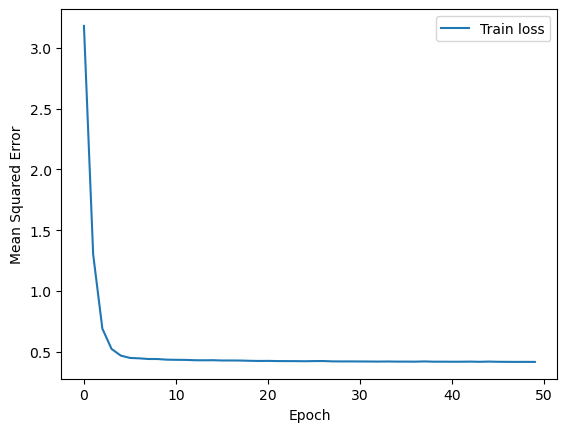

In [114]:
plot_history(history)

In [115]:
model.get_weights()

[array([[ 0.60998225],
        [ 0.1836267 ],
        [-0.20092054],
        [ 0.32319635],
        [ 0.04631029],
        [ 0.04907564],
        [-0.17691511],
        [-0.03861015]], dtype=float32),
 array([-0.00014588], dtype=float32)]

In [116]:
y_test_predict = model.predict(X_test)
y_test_predict

28/28 [==============================] - 0s 1ms/step


array([[-2.37374622e-02],
       [ 4.87719893e-01],
       [ 3.30618948e-01],
       [ 1.47465301e+00],
       [ 7.57736742e-01],
       [ 5.93704760e-01],
       [ 8.35354984e-01],
       [ 9.44605947e-01],
       [ 9.53515410e-01],
       [ 1.22452331e+00],
       [ 9.15141523e-01],
       [ 1.99408442e-01],
       [ 1.38377690e+00],
       [ 9.31504726e-01],
       [ 1.08591843e+00],
       [ 1.12687469e+00],
       [ 1.26608050e+00],
       [ 8.26791883e-01],
       [ 6.31097257e-01],
       [ 1.04745555e+00],
       [ 1.67690545e-01],
       [ 1.57238507e+00],
       [ 1.01223660e+00],
       [ 1.13524783e+00],
       [ 1.32781374e+00],
       [ 1.38345575e+00],
       [ 1.86891901e+00],
       [ 6.79946125e-01],
       [ 8.06517124e-01],
       [ 7.32909083e-01],
       [ 7.22622216e-01],
       [ 9.01989341e-01],
       [ 1.24669600e+00],
       [ 1.36978078e+00],
       [ 2.31740326e-01],
       [-1.69285715e-01],
       [-2.79571526e-02],
       [-1.99192792e-01],
       [ 3.3

In [117]:
mse(Y_test, y_test_predict)

0.2643158442382403

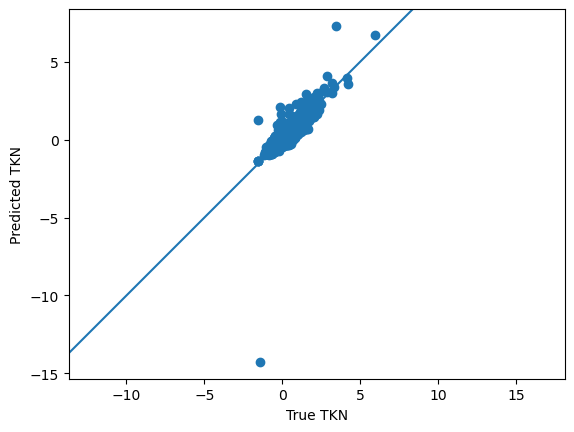

In [104]:
plt.scatter(Y_test, y_test_predict) # this is where y_test comes into play
plt.xlabel('True TKN')
plt.ylabel('Predicted TKN')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])